In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as pl

In [4]:
import os

In [5]:
from modules.pipeline import *

modules.preprocessing successfull loaded: 100%|███| 6/6 [00:02<00:00,  2.96it/s]


In [6]:
num_points = 10
x = sorted(np.random.rand(num_points), reverse=True)
ecart_x = [abs(x[i]) - abs(x[i+1]) for i in range(len(x)-1)]

# Create a Pandas DataFrame
data = pd.DataFrame({'X': x})
ecart = pd.DataFrame({'E':ecart_x})

In [7]:
(data, ecart)

(          X
 0  0.684959
 1  0.476031
 2  0.320719
 3  0.297730
 4  0.285929
 5  0.281511
 6  0.216902
 7  0.122285
 8  0.058093
 9  0.002249,
           E
 0  0.208928
 1  0.155312
 2  0.022989
 3  0.011800
 4  0.004419
 5  0.064609
 6  0.094617
 7  0.064192
 8  0.055844)

In [8]:
var = 'X'
Q1 = data[var].quantile(0.25)
Q3 = data[var].quantile(0.75)
Q3 = data[var].quantile(1) if Q3 == 0 else Q3
(Q1,Q3)

(0.14593928599767778, 0.31497140989969546)

<Axes: >

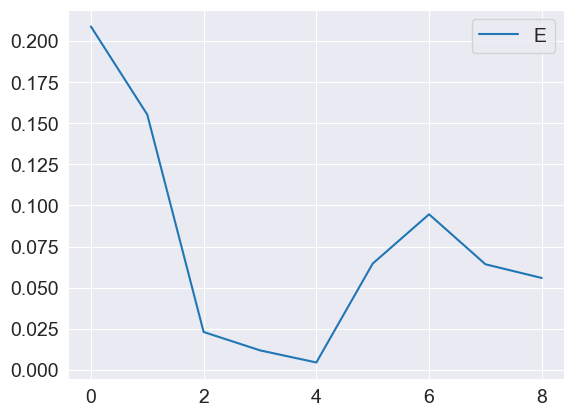

In [9]:
ecart.plot(kind="line")

<Axes: >

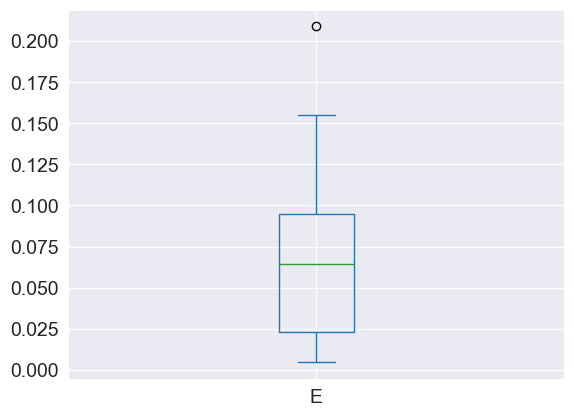

In [10]:
ecart.plot(kind="box")

<Axes: >

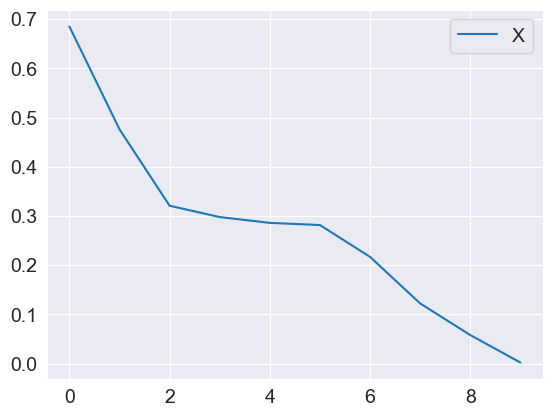

In [11]:
data.plot(kind="line")

In [12]:
var = 'E'
Q1 = ecart[var].quantile(0.25)
Q3 = ecart[var].quantile(0.75)
Q3 = ecart[var].quantile(1) if Q3 == 0 else Q3
print(f"{Q1} - {Q3}")
IQR = Q3 - Q1
# c) compute sup and inf
sup = Q3
# + (1.5 * IQR)
inf = Q1
# - (1.5 * IQR)
limit = list()
for i in range(len(ecart_x)):
    print(f"i={ecart[var][i]}, data={data['X'][i]}, inf={inf}, sup={sup}")
    if ecart[var][i] < inf or ecart[var][i] > sup:
        limit.append(i)
limit

0.02298894264908724 - 0.09461667599059564
i=0.2089284222539386, data=0.6849589730193446, inf=0.02298894264908724, sup=0.09461667599059564
i=0.15531190520343874, data=0.476030550765406, inf=0.02298894264908724, sup=0.09461667599059564
i=0.02298894264908724, data=0.3207186455619673, inf=0.02298894264908724, sup=0.09461667599059564
i=0.01180030979935176, data=0.29772970291288003, inf=0.02298894264908724, sup=0.09461667599059564
i=0.004418771078052552, data=0.2859293931135283, inf=0.02298894264908724, sup=0.09461667599059564
i=0.06460882904485121, data=0.2815106220354757, inf=0.02298894264908724, sup=0.09461667599059564
i=0.09461667599059564, data=0.2169017929906245, inf=0.02298894264908724, sup=0.09461667599059564
i=0.06419179693029387, data=0.12228511700002886, inf=0.02298894264908724, sup=0.09461667599059564
i=0.055843865554742744, data=0.058093320069735, inf=0.02298894264908724, sup=0.09461667599059564


[0, 1, 3, 4]

In [28]:
name = \
    [file for _, _, files in os.walk(
        os.getcwd()  + f'/outputs/GERMAN/withClass/0.5/qualitative/model_storage')
     for file in files if
     '_best_features' in file][0]
outperformers = read_model(
    os.getcwd() + f'/outputs/GERMAN/withClass/0.5/qualitative/model_storage/{name}')[
    "model"]
nbGood = read_model(
    os.getcwd() + f'/outputs/GERMAN/withClass/0.5/qualitative/model_storage/{name}')[
    "nbGood"]
save = read_model(os.getcwd() + f'/outputs/GERMAN/withClass/0.5/qualitative/model_storage/{name}')
outperformers


{0: 29.0323,
 1: 29.0323,
 2: 29.0323,
 3: 29.0323,
 4: 29.0323,
 5: 29.0323,
 6: 29.0323,
 7: 29.0323,
 8: 29.0323,
 9: 29.0323,
 10: 29.0323,
 11: 29.0323,
 12: 29.0323}

In [29]:
save

{'model': {0: 29.0323,
  1: 29.0323,
  2: 29.0323,
  3: 29.0323,
  4: 29.0323,
  5: 29.0323,
  6: 29.0323,
  7: 29.0323,
  8: 29.0323,
  9: 29.0323,
  10: 29.0323,
  11: 29.0323,
  12: 29.0323},
 'nbGood': 13,
 'bestK': 14,
 'name': ['Attribute_1',
  'Attribute_3',
  'Attribute_4',
  'Attribute_6',
  'Attribute_7',
  'Attribute_9',
  'Attribute_10',
  'Attribute_12',
  'Attribute_14',
  'Attribute_15',
  'Attribute_17',
  'Attribute_19',
  'Attribute_20']}

In [14]:
def bestThreshold(data):
    e = [abs(data[i]) - abs(data[i+1]) for i in range(len(data)-1)]
    print(e)
    X = pd.DataFrame({'X': e})
    var = 'X'
    Q1 = X[var].quantile(0.25)
    Q3 = X[var].quantile(0.75)
    Q3 = X[var].quantile(1) if Q3 == 0 else Q3
    print(f"{Q1} - {Q3}")
    IQR = Q3 - Q1
    # c) compute sup and inf
    sup = Q3
    # + (1.5 * IQR)
    inf = Q1
    # - (1.5 * IQR)
    limit = len(data)
    for i in range(len(e)):
        print(f"i={X[var][i]}, data={data[i]}, inf={inf}, sup={sup}")
        if X[var][i] < inf or X[var][i] > sup:
            print("ok")
            limit = i
            break
    return limit

In [15]:
bestThreshold(list(outperformers.values()))

NameError: name 'outperformers' is not defined

In [16]:
bestThreshold(x)

[0.2089284222539386, 0.15531190520343874, 0.02298894264908724, 0.01180030979935176, 0.004418771078052552, 0.06460882904485121, 0.09461667599059564, 0.06419179693029387, 0.055843865554742744]
0.02298894264908724 - 0.09461667599059564
i=0.2089284222539386, data=0.6849589730193446, inf=0.02298894264908724, sup=0.09461667599059564
ok


0

In [17]:
import statistics
def PGES(numbers):
    diffs = [numbers[i] - numbers[i+1] for i in range(len(numbers)-1)] 
    mean_diff = statistics.mean(diffs)
    std_diff = statistics.stdev(diffs)
    result = None
    for i, diff in enumerate(diffs):
        if abs(diff - mean_diff) > std_diff:
            result = i
            break # Sortir de la boucle dès qu'un écart significatif est trouvé 
    return result

In [18]:
numbers =[300,299,297,292,200,150,98,38,12,2,1] 
m=[10,9,8,4,1]
print(PGES(m)) #la sortie est 8
print(PGES(numbers)) #la sortie est 292

2
3


In [19]:
print(PGES(x)) #la sortie est 292

0


In [24]:
['0','1'].__contains__('3')

False

In [31]:
['0','1'][:3]

['0', '1']